In [1]:
using JLD2, Plots, LaTeXStrings, Statistics

In [38]:
h = [0.01*i for i in 1:1000]
cde_ising = [-i*tanh(i)+log(2)+log(cosh(i)) for i in h];
d_cde_ising = [i*i/(cosh(i)^2) for i in h];

In [39]:
h[argmax(d_cde_ising)]

1.2

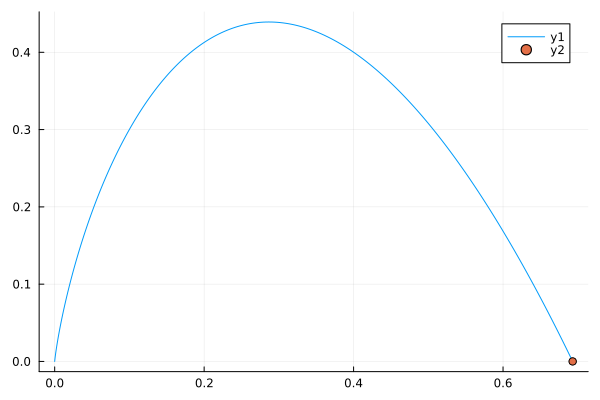

In [40]:
plot(cde_ising, d_cde_ising)
scatter!([log(2),log(2)], [0,0])

In [25]:
cde_ising[1:1000]

1000-element Vector{Float64}:
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 ⋮
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344
 0.6930971830598344

In [7]:
log(2)

0.6931471805599453

In [6]:
@load "../../data_Genie/delta_CDE_over_T.jld2"

4-element Vector{Symbol}:
 :cdes
 :y
 :res
 :idxs

In [30]:
transp = 0.1

scatter(cdes, y, color = :grey, alpha = transp, xaxis = :log, 
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18)
scatter!(cdes[idxs], y[idxs], color = [:blue, :red, :green], xaxis = :log,
    xtickfontsize=10,ytickfontsize=10,labelfontsize=18, marker = :star, markersize =15)
plot!(ylabel=L"\frac{1}{\textrm{T}} \frac{\partial \textrm{ CDE^A}}{\partial \textrm{T}}")  
plot!(xlabel=L"\textrm{CDE^A}")   



plot!(bottom_margin = 6Plots.mm)
plot!(right_margin = 5Plots.mm)
plot!(left_margin = 3Plots.mm)
plot!(legend=:none)
plot!(size=(600,400))

savefig("../../figures/suppl_saverio/delta_CDE_overT.pdf")

"/home/disat/ldibari/figures/suppl_saverio/delta_CDE_overT.pdf"

In [ ]:
using Revise, Genie, StatsBase, Statistics, JLD2, DCAUtils




dbd_msa  = read_fasta_alignment("../Gen.jl/data/alignments/natural/DBD_alignment.uniref90.cov80.a2m", 0.9);
@load "../data_Genie/pars_dbd.jld2"


N_steps = 1*10^3; N_chains = 500; N_start_seq = 3000; NN_points = 200; steps = unique([
        trunc(Int,10^y) for y in range(log10(1), log10(N_steps), 
                length=NN_points)]); N_points = length(steps); w = compute_weights(dbd_msa,
    22, 0.2)[1]; idx_seqs = sample(collect(1:size(dbd_msa,2)), ProbabilityWeights(w), 
    N_start_seq); start_seq = [dbd_msa[:,i] for i in 1:N_start_seq]; w_seqs = w[idx_seqs]; res_all = [];



@time for n in 1:N_start_seq
    res = run_potts(Int8.(hcat([start_seq[n] for i in 1:N_chains]...)), 
        h_dbd, 
        J_dbd, 
        temp = 1.0, 
        N_points = NN_points, 
        N_steps = N_steps);
    if n%10 == 0
        println("Initial seq $(n)")
    end
    push!(res_all, res) 
end

v_ens = [var(energy(res_all[i].step_msa[end], h_dbd, J_dbd)) for i in 1:N_start_seq];


@load "../data_Genie/delta_CDE_over_T.jld2" 


cor(y[1:N_start_seq], v_ens)

close("all"); plt.scatter(y[1:N_start_seq], v_ens); savefig("../prova.png")

In [48]:
@load "../../data_Genie/pca_seq2_dbd.jld2" ;

3-element Vector{Symbol}:
 :pc_nat
 :pc_sils
 :sweeps

In [49]:
scatter(pc_nat[:,1], pc_nat[:,2], alpha = 0.1, label = "nat")
scatter!(pc_sils[5][:,1], pc_sils[5][:,2], color = :black, label = "$(sweeps[5])")
scatter!(pc_sils[4][:,1], pc_sils[4][:,2], color = :pink, label = "$(sweeps[4])")
scatter!(pc_sils[3][:,1], pc_sils[3][:,2], color = :green, label = "$(sweeps[3])")
scatter!(pc_sils[2][:,1], pc_sils[2][:,2], color = :red, label = "$(sweeps[2])")
scatter!(pc_sils[1][:,1], pc_sils[1][:,2], color = :yellow, label = "$(sweeps[1])")
savefig("../../prova2.png")

"/home/disat/ldibari/prova.png"

In [50]:
@load "../../data_Genie/pca_seq1_dbd.jld2" ;

3-element Vector{Symbol}:
 :pc_nat
 :pc_sils
 :sweeps

In [51]:
scatter(pc_nat[:,1], pc_nat[:,2], alpha = 0.1, label = "nat")
scatter!(pc_sils[5][:,1], pc_sils[5][:,2], color = :black, label = "$(sweeps[5])")
scatter!(pc_sils[4][:,1], pc_sils[4][:,2], color = :pink, label = "$(sweeps[4])")
scatter!(pc_sils[3][:,1], pc_sils[3][:,2], color = :green, label = "$(sweeps[3])")
scatter!(pc_sils[2][:,1], pc_sils[2][:,2], color = :red, label = "$(sweeps[2])")
scatter!(pc_sils[1][:,1], pc_sils[1][:,2], color = :yellow, label = "$(sweeps[1])")
savefig("../../prova1.png")

"/home/disat/ldibari/prova1.png"

In [ ]:
function get_eff_fields(seq::Array{Int8,1}, h::Array{Float64,2}, J::Array{Float64,4})
    q,L = size(h);
    res = zeros(size(h));
    for a in 1:q
        for i in 1:L
            res[a,i] += h[a,i]
            for j in 1:L
                res[a,i] += J[a,i,seq[j],j] 
            end
        end
    end
    return res
end
            
    